In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: _________Satakshi Gupta_________
- PRN : ___________250840128027________
- Date : ____________12/11/25__________

# Image Processing with Neural Network
## Assignment A01

## Implement of MP Neuron
### DataSet - As instructed.

## 1. Import Statements

In [19]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn.metrics import accuracy_score  # for accuracy score calculation
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## 2. Setup Global Parameters

In [20]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input' # Set path of input directory as per your system
outDir = '../output' # Set path of input directory as per your system

RANDOM_STATE = 25 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

# Hyperparameters
TEST_SIZE  = 0.3 # Size of test data

In [21]:
df=pd.read_csv("breast_cancer_mod.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


In [24]:
for col in df.columns:
    print(df[col].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]


<BarContainer object of 2 artists>

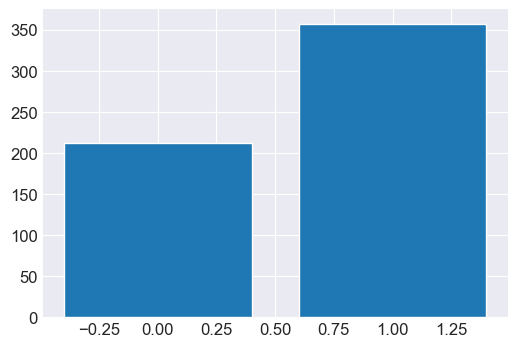

In [25]:
labels=['Malignant','Benign']
fig,ax=plt.subplots(figsize=(6,4))
ax.bar(df['target'].value_counts().index,df['target'].value_counts().values)

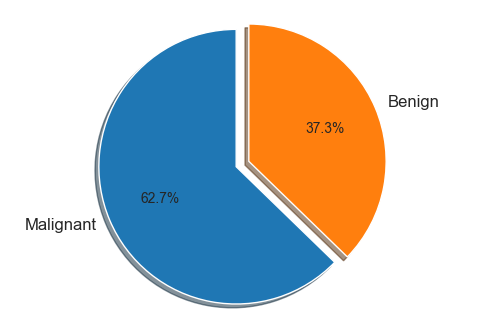

In [26]:
fig,ax=plt.subplots(figsize=(6,4))
explode=(0,0.1)
ax.pie(df['target'].value_counts(),
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',shadow=True,startangle=90)
_=ax.axis('equal')

In [27]:
X=df.drop('target',axis=1)
y=df['target']
X.shape,y.shape

((569, 30), (569,))

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=RANDOM_STATE,test_size=TEST_SIZE,stratify=y)

In [29]:
X_train['total']=X_train.astype(np.int16).sum(axis=1)
X_train['target']=y_train
X_train.sort_values('total',inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [30]:
print(X_train['total'].value_counts())

total
30    165
29     58
28     40
27     22
23     18
24     17
26     17
20     14
25     14
21      8
22      8
16      4
18      3
19      3
15      3
17      2
14      1
12      1
Name: count, dtype: int64


In [31]:
X_test['total']=X_test.astype(np.int16).sum(axis=1)
X_test['target']=y_test
X_test.sort_values('total',inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,15,0
11,0,1,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,1,1,16,0


In [32]:
accuracy={}
for b in range(X_train.shape[1]):
    X_train['pred']=X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['target'],X_train['pred'])




best_b=max(accuracy,key=accuracy.get)
best_b
accuracy[best_b]

0.8668341708542714